#### Investigating the performance of a number of machine learning procedures on the dataset (CE802_P3_Data.zip)

In [1]:
# Importing the neccessary libraries for loading the data and visualization of data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("CE802_P3_Data.csv")

In [3]:
# Displaying the first five rows of the dataset using function head()
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,Very low,280.78,11.44,-4.77,52.05,171.46,6,0.00
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,Very high,0.02,7.78,-6.82,26.49,119.34,4,1073.28
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,Medium,16.32,8.14,-0.91,26.97,15.96,7,1203.67
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,High,1.08,2.28,-8.12,35.34,176.32,1,789.66
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,Low,134.62,13.82,-5.92,31.47,117.94,4,2093.67


In [4]:
# Checking the shape i.e the total number of Rows and number of Features
df.shape

(1500, 17)

In [5]:
# Checking the data type of each feature and number of Null Values in each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   object 
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   int64  
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


Data Cleaning: Handling NA values

In [6]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

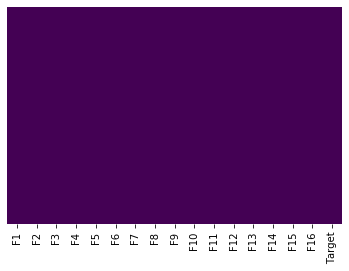

In [7]:
# By analysing the data we can clearly see that there are no null values so I am proceeding further
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Exploring the data

In [8]:
# Analysing the statistical information
df.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-630.78434,-92.061967,-2311.234440,24115.645020,4.041660,60.448080,-6.962873,11.828000,127.205547,8.109187,-3.634847,29.630000,176.946267,3.947333,922.082533
std,904.26205,29.857614,889.404292,13329.106617,2.893909,58.613624,3.024250,5.430108,1548.308592,5.812853,3.040026,12.549426,84.482786,1.836702,1092.331874
min,-3708.93000,-210.780000,-5503.920000,-35169.510000,0.040000,-144.460000,-16.390000,0.000000,0.000000,0.080000,-13.700000,-53.220000,-204.060000,0.000000,0.000000
25%,-1233.33000,-112.110000,-2926.252500,17982.390000,1.945000,21.720000,-9.080000,9.000000,0.260000,3.815000,-5.590000,23.955000,134.800000,3.000000,0.000000
50%,-641.53500,-92.015000,-2302.755000,24118.815000,3.415000,62.060000,-6.960000,12.000000,2.020000,6.740000,-3.530000,29.685000,177.070000,4.000000,429.570000
75%,-3.56250,-71.195000,-1703.347500,30824.220000,5.492500,99.740000,-4.840000,15.000000,13.610000,10.945000,-1.655000,35.565000,216.945000,5.000000,1530.205000
max,2521.86000,13.160000,671.100000,85176.180000,23.390000,239.820000,2.060000,30.000000,54949.060000,45.140000,6.070000,78.390000,738.880000,11.000000,3960.010000


In [9]:
df.corr()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
F2,1.000000,0.061850,-0.007113,-0.007832,-0.041882,0.051243,-0.004091,-0.002825,0.040372,-0.012850,0.039825,0.000184,0.016704,0.007670,-0.263022
F3,0.061850,1.000000,0.001042,0.013438,0.050148,-0.012594,0.012025,-0.064451,0.006548,-0.017902,-0.004979,-0.035125,0.002309,0.000822,0.015412
F4,-0.007113,0.001042,1.000000,0.010391,0.001317,0.006295,0.023763,0.013712,-0.006771,-0.005397,-0.019297,0.033006,0.072085,-0.014783,-0.300890
F5,-0.007832,0.013438,0.010391,1.000000,-0.007184,-0.007560,-0.006157,0.004620,0.066430,0.060349,0.042207,0.024939,0.012488,0.004651,0.029194
F6,-0.041882,0.050148,0.001317,-0.007184,1.000000,-0.000099,0.009609,0.005589,-0.005763,-0.022325,0.021228,0.036053,-0.014407,0.003647,0.346373
F7,0.051243,-0.012594,0.006295,-0.007560,-0.000099,1.000000,-0.000302,0.011457,-0.011987,-0.046542,0.012457,-0.027557,-0.009240,0.018839,-0.430990
F8,-0.004091,0.012025,0.023763,-0.006157,0.009609,-0.000302,1.000000,-0.004793,0.032332,0.037862,0.017546,-0.020489,0.031183,-0.002310,0.020443
F9,-0.002825,-0.064451,0.013712,0.004620,0.005589,0.011457,-0.004793,1.000000,-0.013561,-0.013474,0.006276,0.049907,-0.007359,0.006516,-0.236200
F11,0.040372,0.006548,-0.006771,0.066430,-0.005763,-0.011987,0.032332,-0.013561,1.000000,0.059413,0.014330,0.001758,0.027544,0.046442,0.027713
F12,-0.012850,-0.017902,-0.005397,0.060349,-0.022325,-0.046542,0.037862,-0.013474,0.059413,1.000000,-0.018861,0.032430,-0.026478,-0.028201,0.357137


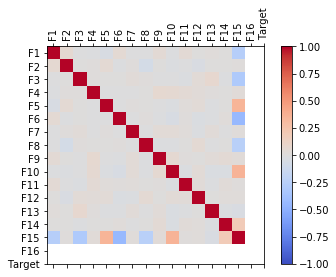

In [10]:
# Ploting the correlation between the features
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [11]:
df['F1'].value_counts()

USA       407
UK        380
Rest      360
Europe    353
Name: F1, dtype: int64

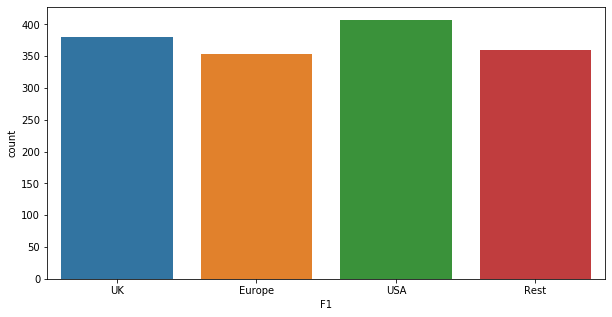

In [12]:
# Ploting the F1 feature to analyse the count of each
plt.subplots(figsize=(10,5))
sns.countplot(df['F1'],data=df)
plt.show()

In [13]:
df['F10'].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F10, dtype: int64

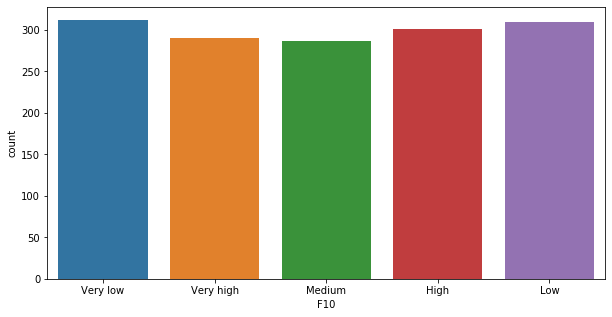

In [14]:
# Ploting the F10 feature to analyse the count of each
plt.subplots(figsize=(10,5))
sns.countplot(df['F10'],data=df)
plt.show()

In [15]:
# To convert the categorical variables into numerical variables, I am using Label encode to 
# encode the data 
from sklearn.preprocessing import LabelEncoder 
label_encode = LabelEncoder() 
df['F1']= label_encode.fit_transform(df['F1']) 
df['F10']= label_encode.fit_transform(df['F10']) 


In [16]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,2,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,4,280.78,11.44,-4.77,52.05,171.46,6,0.00
1,0,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,3,0.02,7.78,-6.82,26.49,119.34,4,1073.28
2,2,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,2,16.32,8.14,-0.91,26.97,15.96,7,1203.67
3,3,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,0,1.08,2.28,-8.12,35.34,176.32,1,789.66
4,0,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,1,134.62,13.82,-5.92,31.47,117.94,4,2093.67


In [17]:
# Checking the unique values in our data
df.nunique()

F1           4
F2        1492
F3        1399
F4        1488
F5        1500
F6         737
F7        1405
F8         839
F9          11
F10          5
F11        703
F12        728
F13        833
F14        905
F15       1411
F16         12
Target    1051
dtype: int64

In [18]:
test_df = pd.read_csv("CE802_P3_Test.csv")
test_df.head()

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0,1,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12,1,0.32,10.92,-0.83,15.60,193.70,3,754.042714
1,1,0,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15,3,1.54,6.72,-10.07,22.41,238.70,3,-296.943038
2,2,3,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12,0,0.00,16.56,-7.42,23.25,149.26,2,808.851581
3,3,3,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12,0,8.32,17.92,1.38,27.42,310.32,3,1821.370095
4,4,1,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9,0,0.38,15.92,-6.15,23.22,241.56,2,1622.649306


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1500 non-null   int64  
 1   F1          1500 non-null   int64  
 2   F2          1500 non-null   float64
 3   F3          1500 non-null   float64
 4   F4          1500 non-null   float64
 5   F5          1500 non-null   float64
 6   F6          1500 non-null   float64
 7   F7          1500 non-null   float64
 8   F8          1500 non-null   float64
 9   F9          1500 non-null   int64  
 10  F10         1500 non-null   int64  
 11  F11         1500 non-null   float64
 12  F12         1500 non-null   float64
 13  F13         1500 non-null   float64
 14  F14         1500 non-null   float64
 15  F15         1500 non-null   float64
 16  F16         1500 non-null   int64  
 17  Target      1500 non-null   float64
dtypes: float64(13), int64(5)
memory usage: 211.1 KB


In [20]:
# To convert the categorical variables into numerical variables, I am using Label encode to 
# encode the data just like we did in Train dataset
test_df['F1']= label_encode.fit_transform(test_df['F1']) 
test_df['F10']= label_encode.fit_transform(test_df['F10']) 

In [21]:
X_test=test_df.drop(['Target'],axis=1)
y_test=test_df['Target']

In [22]:
# Assigning the features of the train data set except the Target variable to X_train
X_train=df.drop(['Target'],axis=1)
X_train
X_train.shape

(1500, 16)

In [23]:
# Assigning the Target variable to y_train.
y_train=df['Target']
y_train.shape

(1500,)

### Training the model

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

##### Linear Regression

In [25]:
# Creating an object for the Linear Regression model
linear_regression = LinearRegression()
# Fitting the model on the training data
linear_regression.fit(X_train, y_train)

print('Linear Regression')
# R2 for train and test data
R2_lr_train = linear_regression.score(X_train,y_train)
print('R square: %.2f' %(R2_lr_train))

# Importing square root from Math library to find Root Mean Square Error
from math import sqrt
RMSE_lr_train = sqrt(np.mean((y_train - linear_regression.predict(X_train))**2))
print('Root mean squared error: %.2f' %(RMSE_lr_train))

Linear Regression
R square: 0.72
Root mean squared error: 579.58


##### Lasso Regression 

In [26]:
# Creating an object for the Lasso regression model
lasso = Lasso(max_iter = 100000, tol=0.1)
# Fitting the model on the training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)

In [27]:
# Importing library to find out R2 score
from sklearn.metrics import r2_score

print('Lasso regression')
R2_lasso_train = r2_score(lasso.predict(X_train), y_train)
print('R squared: %.2f' %(R2_lasso_train))
RMSE_lasso_train = sqrt(mean_squared_error(lasso.predict(X_train), y_train))
print('Root mean squared error: %.2f' %(RMSE_lasso_train))

Lasso regression
R squared: 0.61
Root mean squared error: 579.59


##### Ridge Regression

In [28]:
# Creating an object for Ridge
ridge_grid = Ridge()

In [29]:
from sklearn.model_selection import  GridSearchCV
# Importing library to find out R2 score 
from sklearn.metrics import r2_score

# Fitting the training model 
ridge_grid.fit(X_train, y_train)
print('Ridge Regression')
# R2 for train
R2_ridge_grid_train = r2_score(ridge_grid.predict(X_train), y_train)
print('R square: %.3f' %(R2_ridge_grid_train))

RMSE_ridge_grid_train = sqrt(mean_squared_error(ridge_grid.predict(X_train), y_train))
print('Root mean squared error: %.3f' %(RMSE_ridge_grid_train))

Ridge Regression
R square: 0.608
Root mean squared error: 579.584


In [36]:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import svm

clf = svm.SVR(kernel="rbf")

clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:

scoring = ['mean_absolute_error', 'mean_squared_error', 'r2']


scores = cross_validate(clf, X_train, y_train, cv=KFold(10, shuffle=True), scoring=scoring, return_train_score=False)



score = scores['test_r2']
print("R^2: %.4f (%.4f)" % (score.mean(), score.std()))

ValueError: 'mean_absolute_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [45]:
# R2 for train
svr_r2 = r2_score(clf.predict(X_train), y_train)
print('R square: %.3f' %(svr_r2))

svr_rmse = sqrt(mean_squared_error(clf.predict(X_train), y_train))
print('Root mean squared error: %.3f' %(svr_rmse))

R square: -43702.761
Root mean squared error: 1196.704


In [47]:
# Creating a data frame to compare the Machine learning model and to chose the best model based on the accuracy
data = {'Regression Technique':  ['Linear Regression', 'Lasso Regression','Ridge Regression'],
        'Root Mean Squared Error': [RMSE_lr_train, RMSE_lasso_train, RMSE_ridge_grid_train],
        'R square' : [R2_lr_train, R2_lasso_train, R2_ridge_grid_train]
        
        }

df_comp = pd.DataFrame (data, columns = ['Regression Technique','Root Mean Squared Error', 'R square'])

df_comp

,Regression Technique,Root Mean Squared Error,R square
0,Linear Regression,579.583873,0.718283
1,Lasso Regression,579.585696,0.607181
2,Ridge Regression,579.583893,0.607733


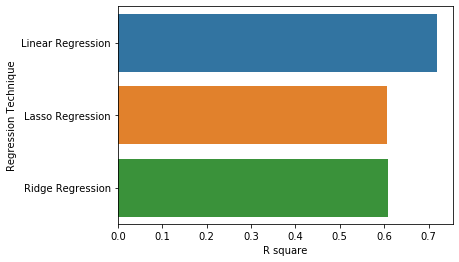

In [48]:
# Visualisation of R2 Scores
sns.barplot(x=df_comp['R square'], y=df_comp['Regression Technique'], data=df_comp)

###### From the above analysis of the performance the machine learning techniques for regression, we can clearly say that Linear Regression is performing well based on most R2 score and least Root Mean Squared Error compared to other models.

### Prediction on a hold-out test set

In [ ]:
# Using Linear Regression for our final model
Predictions = linear_regression.predict(X_test)

In [ ]:
# Saving the predicted values to test data to the target variable
X_test['Target'] = Predictions
X_test.head()

In [ ]:
X_test.to_csv("CE802_P3_Test.csv")